Implementation using Dijkstra Algorithm


Shortest Path : 
Path: LIBRARY->41->4->39->14->13->10->UPASANA
Distance: 472 meters (0.47 kilometers)



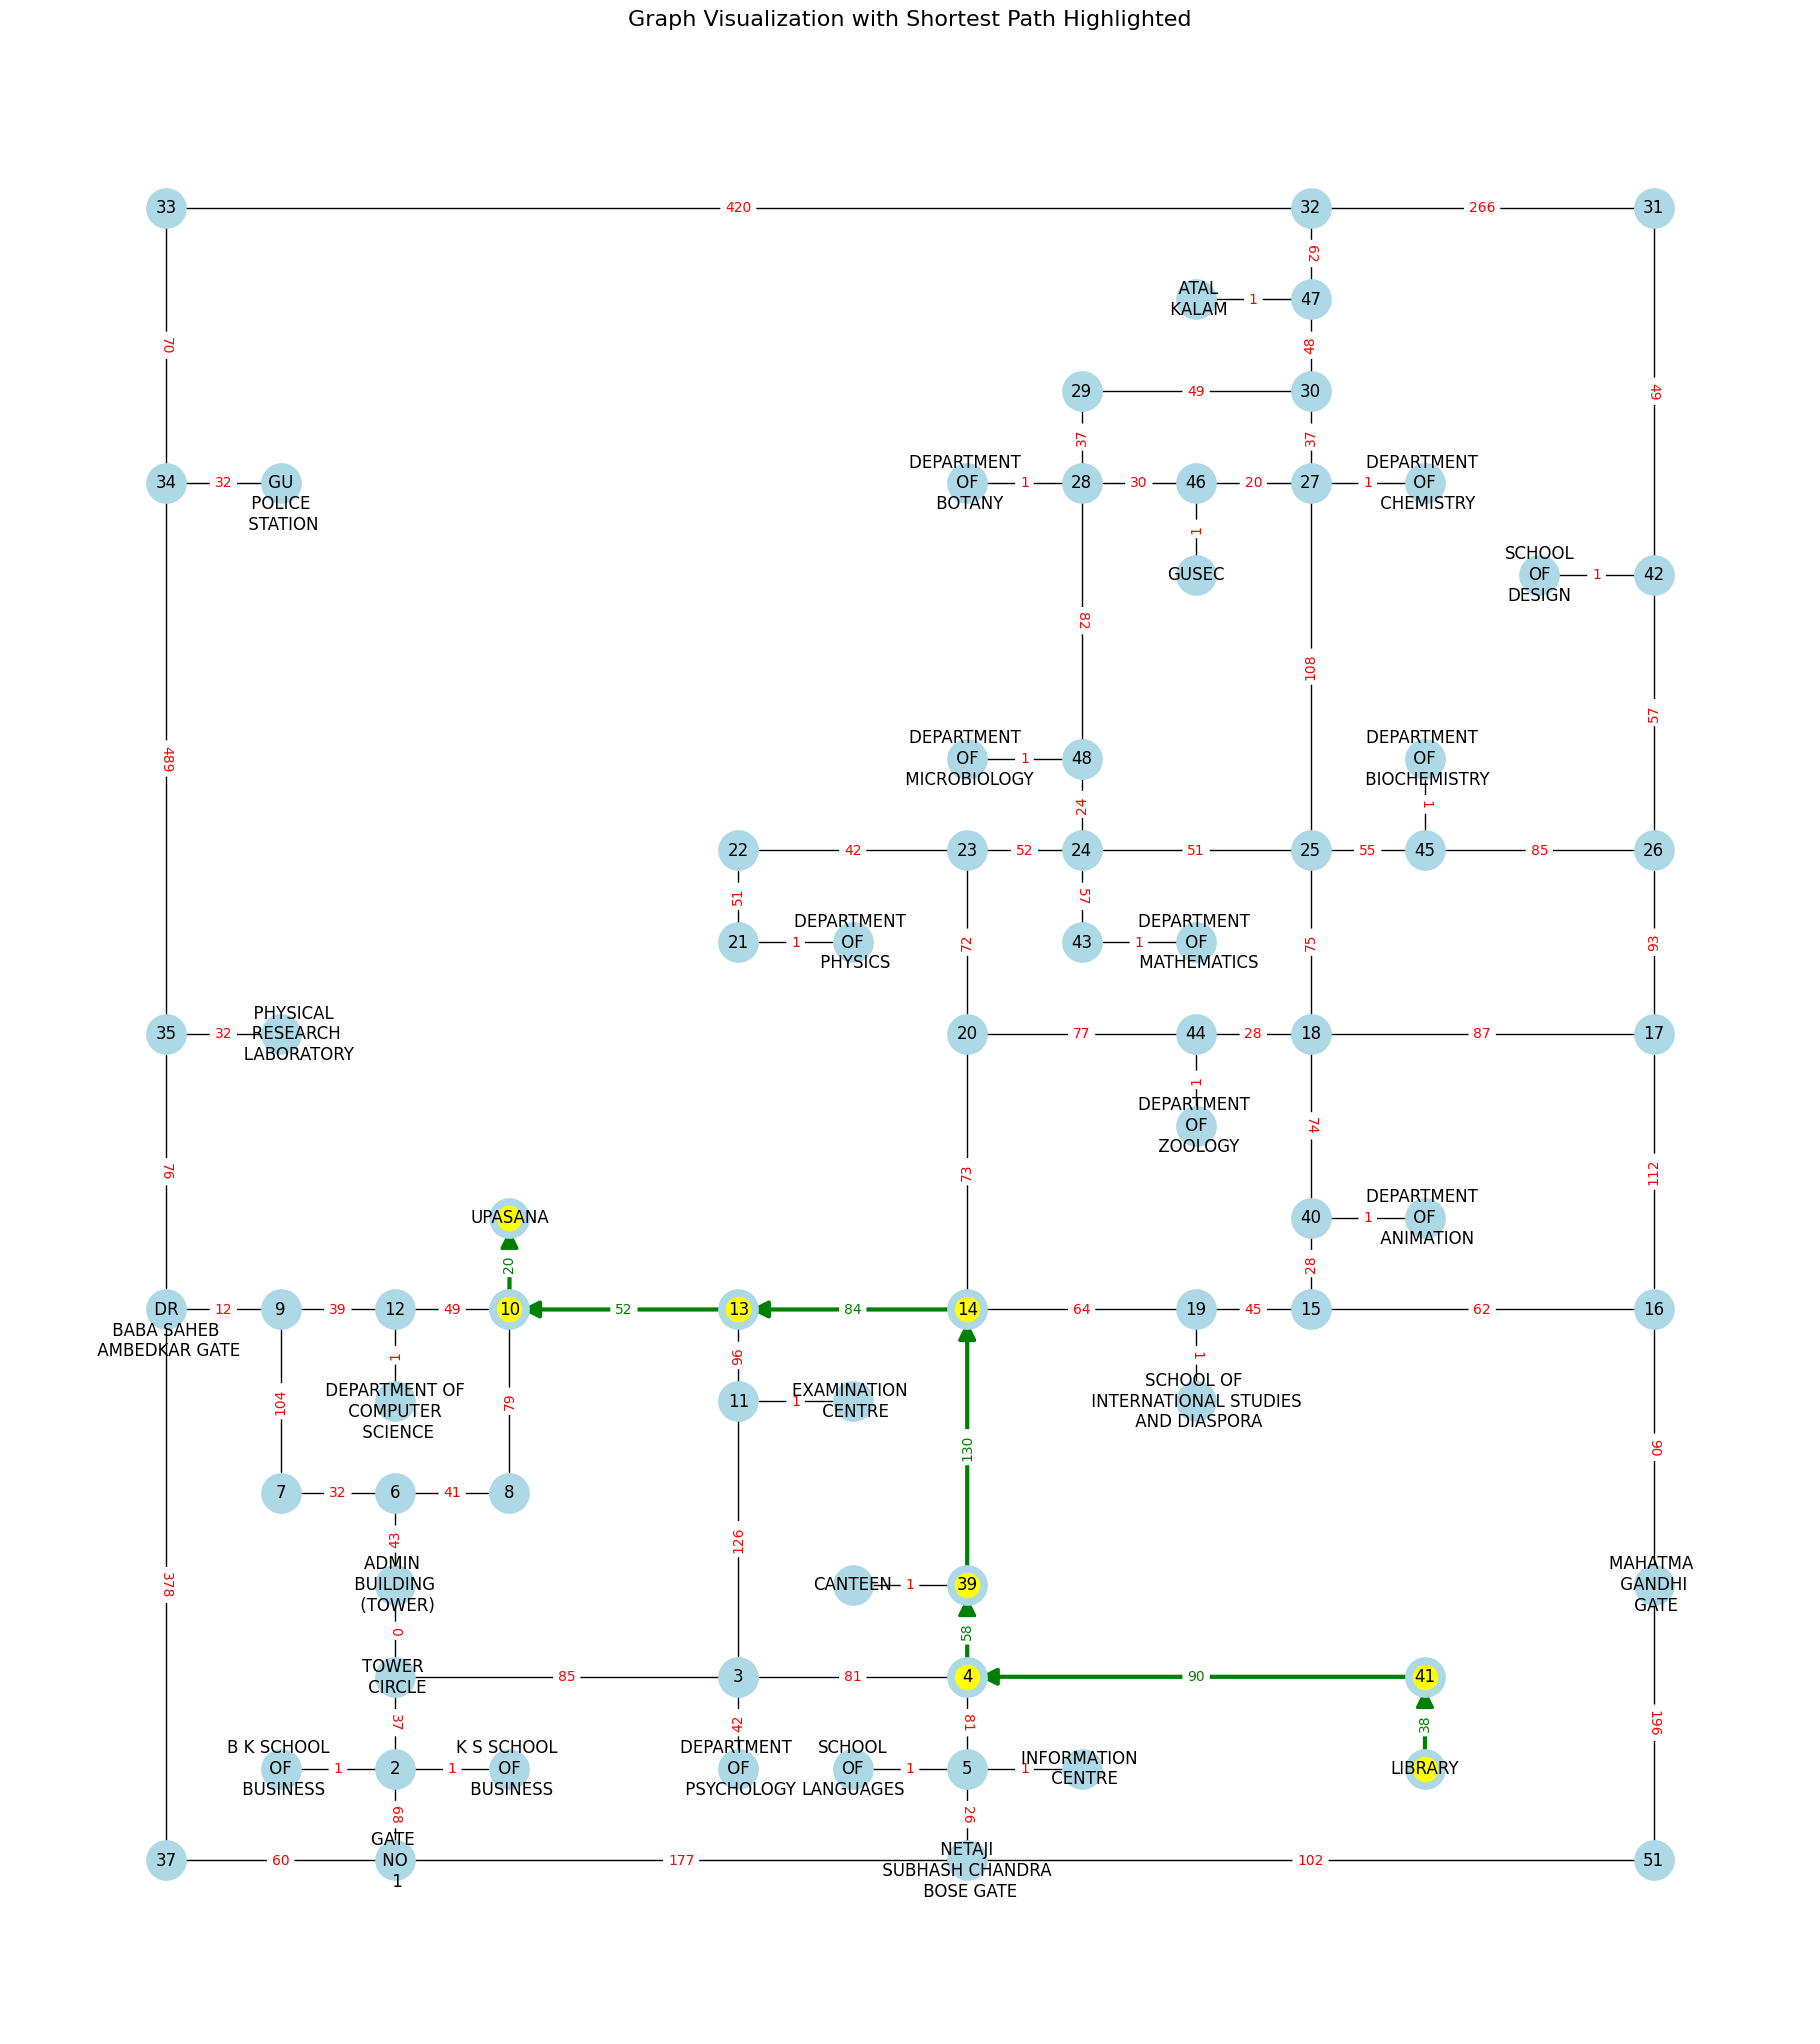

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size
        self.edges = []  # To store edges for visualization
        self.node_positions = {}  # Fixed positions for nodes
        self.display_labels = {}  # For visualization purposes

    def add_vertex_data(self, vertex, data, position):
        if 0 <= vertex < self.size:
            # Normalize vertex names: strip spaces and replace newlines
            cleaned_data = ' '.join(data.strip().split())
            self.vertex_data[vertex] = cleaned_data
            self.node_positions[vertex] = position  # Set fixed position for visualization
            self.display_labels[vertex] = data  # Use original formatting for display

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # For undirected graph
            self.edges.append((u, v, weight))  # Save edges for visualization
    
    def dijkstra(self, start_vertex_data, end_vertex_data):
        try:
            start_vertex = self.vertex_data.index(start_vertex_data)
            end_vertex = self.vertex_data.index(end_vertex_data)
        except ValueError:
            return float('inf'), []  # Return 'infinite' distance and an empty path if vertices are invalid

        distances = [float('inf')] * self.size
        predecessors = [None] * self.size
        distances[start_vertex] = 0
        visited = [False] * self.size

        for _ in range(self.size):
            min_distance = float('inf')
            u = None
            for i in range(self.size):
                if not visited[i] and distances[i] < min_distance:
                    min_distance = distances[i]
                    u = i

            if u is None or u == end_vertex:
                break

            visited[u] = True

            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:
                    alt = distances[u] + self.adj_matrix[u][v]
                    if alt < distances[v]:
                        distances[v] = alt
                        predecessors[v] = u

        return distances[end_vertex], self.get_path(predecessors, start_vertex_data, end_vertex_data)

    def get_path(self, predecessors, start_vertex_data, end_vertex_data):
        path = []
        try:
            current = self.vertex_data.index(end_vertex_data)
        except ValueError:
            return []  # Return empty path if the vertex doesn't exist

        while current is not None:
            path.insert(0, self.vertex_data[current])
            current = predecessors[current]
            if current == self.vertex_data.index(start_vertex_data):
                path.insert(0, start_vertex_data)
                break
        return path

    def visualize(self, path=[]):
        G = nx.Graph()
        for i, label in enumerate(self.vertex_data):
            G.add_node(i, label=self.display_labels.get(i, label))  # Use display labels if available
        for u, v, weight in self.edges:
            G.add_edge(u, v, weight=weight)

        # Scale positions to increase path length
        scaled_positions = {i: (x * 1.5, y * 1.5) for i, (x, y) in self.node_positions.items()}
        labels = nx.get_node_attributes(G, 'label')
        edge_labels = nx.get_edge_attributes(G, 'weight')

        # Draw base graph
        plt.figure(figsize=(18, 20))  # Adjust the figure size for better visualization
        nx.draw(G, scaled_positions, with_labels=False, node_size=800, node_color="lightblue")
        nx.draw_networkx_labels(G, scaled_positions, labels, font_size=12, font_color="black")
        nx.draw_networkx_edge_labels(G, scaled_positions, edge_labels=edge_labels, font_color="red")

        if path:
            H = nx.DiGraph()
            path_indices = [self.vertex_data.index(node) for node in path]
            for i in range(len(path_indices) - 1):
                u, v = path_indices[i], path_indices[i + 1]
                weight = self.adj_matrix[u][v]
                H.add_edge(u, v, weight=weight)

            path_edge_labels = nx.get_edge_attributes(H, 'weight')
            nx.draw_networkx_edges(H, scaled_positions, edgelist=H.edges(), edge_color="green", width=3, arrows=True, arrowsize=25)
            nx.draw_networkx_nodes(G, scaled_positions, nodelist=path_indices, node_color="yellow")
            nx.draw_networkx_edge_labels(H, scaled_positions, edge_labels=path_edge_labels, font_color="green")

        plt.title("Graph Visualization with Shortest Path Highlighted", fontsize=16)
        plt.show()

# Initialize the graph
g = Graph(76)

# Scaling factor to increase the base area
SCALING_FACTOR = 50  # Adjust this value to increase the area

# Adding vertices with fixed positions
g.add_vertex_data(0, 'ADMIN \n BUILDING \n (TOWER)', (0 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(1, 'B K SCHOOL \n OF \n BUSINESS', (-1 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(2, 'K S SCHOOL \n OF \n BUSINESS', (1 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(3, 'DEPARTMENT \n OF \n PSYCHOLOGY', (3 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(4, 'SCHOOL\nOF\nLANGUAGES', (4 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(5, 'INFORMATION \n CENTRE', (6 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(6, 'LIBRARY', (9 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(7, '\n DEPARTMENT OF \n COMPUTER \n SCIENCE', (0 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(8, 'UPASANA', (1 * SCALING_FACTOR, 4 * SCALING_FACTOR))
g.add_vertex_data(9, 'DEPARTMENT \n OF \n PHYSICS', (4 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(10, 'DEPARTMENT \n OF \n ZOOLOGY', (7 * SCALING_FACTOR, 5 * SCALING_FACTOR))
g.add_vertex_data(11, 'DEPARTMENT \n OF \n ANIMATION', (9 * SCALING_FACTOR, 4 * SCALING_FACTOR))
g.add_vertex_data(12, 'DEPARTMENT \n OF \n BOTANY', (5 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(13, 'DEPARTMENT \n OF \n MICROBIOLOGY', (5 * SCALING_FACTOR, 9 * SCALING_FACTOR))
g.add_vertex_data(14, '  ATAL \n KALAM', (7 * SCALING_FACTOR, 14 * SCALING_FACTOR))
g.add_vertex_data(15, 'DEPARTMENT \n OF \n CHEMISTRY', (9 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(16, 'DEPARTMENT \n OF \n BIOCHEMISTRY', (9 * SCALING_FACTOR, 9 * SCALING_FACTOR))
g.add_vertex_data(17, '      PHYSICAL \n       RESEARCH \n       LABORATORY', (-1 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(18, '\n \n GU \n POLICE \n STATION', (-1 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(19, 'SCHOOL\nOF\nDESIGN', (10 * SCALING_FACTOR, 11 * SCALING_FACTOR))
g.add_vertex_data(20, 'DEPARTMENT \n OF \n MATHEMATICS', (7 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(21, 'GUSEC', (7 * SCALING_FACTOR, 11 * SCALING_FACTOR))
g.add_vertex_data(75, 'SCHOOL OF \n INTERNATIONAL STUDIES \n AND DIASPORA', (7 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(22, 'EXAMINATION \n CENTRE', (4 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(23, 'CANTEEN', (4 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(24, 'TOWER \n CIRCLE', (0 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(25, '2', (0 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(26, '3', (3 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(27, '4', (5 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(28, '5', (5 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(29, '6', (0 * SCALING_FACTOR, 1 * SCALING_FACTOR))
g.add_vertex_data(30, '7', (-1 * SCALING_FACTOR, 1 * SCALING_FACTOR))
g.add_vertex_data(31, '8', (1 * SCALING_FACTOR, 1 * SCALING_FACTOR))
g.add_vertex_data(32, '9', (-1 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(33, '10', (1 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(34, '11', (3 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(35, '12', (0 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(36, '13', (3 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(37, '14', (5 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(38, '15', (8 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(39, '16', (11 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(40, '17', (11 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(41, '18', (8 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(42, '19', (7 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(43, '20', (5 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(44, '21', (3 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(45, '22', (3 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(46, '23', (5 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(47, '24', (6 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(48, '25', (8 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(49, '26', (11 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(50, '27', (8 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(51, '28', (6 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(52, '29', (6 * SCALING_FACTOR, 13 * SCALING_FACTOR))
g.add_vertex_data(53, '30', (8 * SCALING_FACTOR, 13 * SCALING_FACTOR))
g.add_vertex_data(54, '31', (11 * SCALING_FACTOR, 15 * SCALING_FACTOR))
g.add_vertex_data(55, '32', (8 * SCALING_FACTOR, 15 * SCALING_FACTOR))
g.add_vertex_data(56, '33', (-2 * SCALING_FACTOR, 15 * SCALING_FACTOR))
g.add_vertex_data(57, '34', (-2 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(58, '35', (-2 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(59, '\n \n DR \n BABA SAHEB \n AMBEDKAR GATE', (-2 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(60, '37', (-2 * SCALING_FACTOR, -3 * SCALING_FACTOR))
g.add_vertex_data(61, 'GATE \n NO \n 1', (0 * SCALING_FACTOR, -3 * SCALING_FACTOR))
g.add_vertex_data(62, '39', (5 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(63, '40', (8 * SCALING_FACTOR, 4 * SCALING_FACTOR))
g.add_vertex_data(64, '41', (9 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(65, '42', (11 * SCALING_FACTOR, 11 * SCALING_FACTOR))
g.add_vertex_data(66, '43', (6 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(67, '44', (7 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(68, '45', (9 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(69, '46', (7 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(70, '47', (8 * SCALING_FACTOR, 14 * SCALING_FACTOR))
g.add_vertex_data(71, '48', (6 * SCALING_FACTOR, 9 * SCALING_FACTOR))
g.add_vertex_data(72, '\n NETAJI \n SUBHASH CHANDRA \n BOSE GATE', (5 * SCALING_FACTOR, -3 * SCALING_FACTOR))
g.add_vertex_data(73, 'MAHATMA \n GANDHI \n GATE', (11 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(74, '51', (11 * SCALING_FACTOR, -3 * SCALING_FACTOR))

# Adding edges with distances in meters
g.add_edge(0, 24, 0)  # A - 1, weight 0 meters
g.add_edge(0, 29, 43)  # A - 6, weight 43 meters
g.add_edge(1, 25, 1)  # B - 2, weight 1 meters
g.add_edge(2, 25, 1)  # C - 2, weight 1 meters
g.add_edge(3, 26, 42)  # D - 3, weight 42 meters
g.add_edge(4, 28, 1)  # E - 5, weight 1 meters
g.add_edge(5, 28, 1)  # F - 5, weight 1 meters
g.add_edge(6, 64, 38)  # G - 41, weight 38 meters
g.add_edge(7, 35, 1)  # H - 12, weight 1 meters
g.add_edge(8, 33, 20)  # I - 10, weight 20 meters
g.add_edge(9, 44, 1)  # J - 21, weight 1 meters
g.add_edge(10, 67, 1)  # K - 44, weight 1 meters
g.add_edge(11, 63, 1)  # L - 40, weight 1 meters
g.add_edge(12, 51, 1)  # M - 28, weight 1 meters
g.add_edge(13, 71, 1)  # N - 48, weight 1 meters
g.add_edge(14, 70, 1)  # O - 47, weight 1 meters
g.add_edge(15, 50, 1)  # P - 27, weight 1 meters
g.add_edge(16, 68, 1)  # Q - 45, weight 1 meters
g.add_edge(17, 58, 32)  # R - 35, weight 32 meters
g.add_edge(18, 57, 32)  # S - 34, weight 32 meters
g.add_edge(19, 65, 1)  # T - 42, weight 1 meters
g.add_edge(20, 66, 1)  # U - 43, weight 1 meters
g.add_edge(21, 69, 1)  # V - 46, weight 1 meters
g.add_edge(22, 34, 47)  # X - 11, weight 1 meters
g.add_edge(23, 62, 47)  # Y - 39, weight 1 meters
g.add_edge(24, 0, 0)  # 1 - A, weight 0 meters
g.add_edge(24, 25, 37)  # 1 - 2, weight 37 meters
g.add_edge(24, 26, 85)  # 1 - 3, weight 85 meters
g.add_edge(25, 24, 37)  # 2 - 1, weight 37 meters
g.add_edge(25, 1, 1)  # 2 - B, weight 1 meters
g.add_edge(25, 2, 1)  # 2 - C, weight 1 meters
g.add_edge(25, 61, 68)  # 2 - 38, weight 68 meters
g.add_edge(26, 3, 42)  # 3 - D, weight 42 meters
g.add_edge(26, 24, 85)  # 3 - 1, weight 85 meters
g.add_edge(26, 27, 81)  # 3 - 4, weight 81 meters
g.add_edge(26, 34, 126)  # 3 - 11, weight 126 meters
g.add_edge(27, 26, 81)  # 4 - 3, weight 81 meters
g.add_edge(27, 28, 81)  # 4 - 5, weight 81 meters
g.add_edge(27, 62, 39)  # 4 - 39, weight 58 meters
g.add_edge(27, 64, 90)  # 4 - 41, weight 90 meters
g.add_edge(28, 27, 81)  # 5 - 4, weight 81 meters
g.add_edge(28, 4, 1)  # 5 - E, weight 1 meters
g.add_edge(28, 5, 1)  # 5 - F, weight 1 meters
g.add_edge(28, 72, 26)  # 5 - 49, weight 26 meters
g.add_edge(29, 0, 43)  # 6 - A, weight 43 meters
g.add_edge(29, 30, 32)  # 6 - 7, weight 32 meters
g.add_edge(29, 31, 41)  # 6 - 8, weight 41 meters
g.add_edge(30, 29, 32)  # 7 - 6, weight 32 meters
g.add_edge(30, 32, 104)  # 7 - 9, weight 104 meters
g.add_edge(31, 29, 41)  # 8 - 6, weight 41 meters
g.add_edge(31, 33, 79)  # 8 - 10, weight 79 meters
g.add_edge(32, 30, 104)  # 9 - 7, weight 104 meters
g.add_edge(32, 35, 39)  # 9 - 12, weight 39 meters
g.add_edge(32, 59, 12)  # 9 - 36, weight 22 meters
g.add_edge(33, 35, 49)  # 10 - 12, weight 49 meters
g.add_edge(33, 36, 52)  # 10 - 13, weight 52 meters
g.add_edge(33, 31, 79)  # 10 - 8, weight 79 meters
g.add_edge(34, 22, 1)  # 11 - X, weight 1 meters
g.add_edge(34, 36, 96)  # 11 - 13, weight 96 meters
g.add_edge(34, 26, 126)  # 11 - 3, weight 126 meters
g.add_edge(35, 33, 49)  # 12 - 10, weight 49 meters
g.add_edge(35, 32, 39)  # 12 - 9, weight 39 meters
g.add_edge(36, 34, 96)  # 13 - 11, weight 96 meters
g.add_edge(36, 33, 52)  # 13 - 10, weight 52 meters
g.add_edge(36, 37, 84)  # 13 - 14, weight 84 meters
g.add_edge(37, 36, 84)  # 14 - 13, weight 84 meters
g.add_edge(37, 42, 64)  # 14 - 19, weight 64 meters
g.add_edge(37, 62, 130)  # 14 - 39, weight 130 meters
g.add_edge(37, 43, 73)  # 14 - 20, weight 73 meters
g.add_edge(38, 42, 45)  # 15 - 19, weight 45 meters
g.add_edge(38, 39, 62)  # 15 - 16, weight 62 meters
g.add_edge(38, 63, 28)  # 15 - 40, weight 28 meters
g.add_edge(39, 38, 62)  # 16 - 15, weight 62 meters
g.add_edge(39, 40, 112)  # 16 - 17, weight 112 meters
g.add_edge(39, 73, 90)  # 16 - 50, weight 90 meters
g.add_edge(40, 39, 112)  # 17 - 16, weight 112 meters
g.add_edge(40, 41, 87)  # 17 - 18, weight 87 meters
g.add_edge(40, 49, 93)  # 17 - 26, weight 93 meters
g.add_edge(41, 40, 87)  # 18 - 17, weight 87 meters
g.add_edge(41, 63, 74)  # 18 - 40, weight 74 meters
g.add_edge(41, 67, 28)  # 18 - 44, weight 28 meters
g.add_edge(41, 48, 75)  # 18 - 25, weight 75 meters
g.add_edge(43, 37, 73)  # 20 - 14, weight 73 meters
g.add_edge(43, 46, 72)  # 20 - 23, weight 72 meters
g.add_edge(43, 67, 77)  # 20 - 44, weight 77 meters
g.add_edge(44, 9, 1)  # 21 - J, weight 1 meters
g.add_edge(44, 45, 51)  # 21 - 22, weight 51 meters
g.add_edge(45, 44, 51)  # 22 - 21, weight 51 meters
g.add_edge(45, 46, 42)  # 22 - 23, weight 42 meters
g.add_edge(46, 45, 42)  # 23 - 22, weight 42 meters
g.add_edge(46, 47, 52)  # 23 - 24, weight 52 meters
g.add_edge(46, 43, 72)  # 23 - 20, weight 72 meters
g.add_edge(47, 46, 52)  # 24 - 23, weight 52 meters
g.add_edge(47, 71, 24)  # 24 - 48, weight 24 meters
g.add_edge(47, 48, 51)  # 24 - 25, weight 51 meters
g.add_edge(47, 66, 57)  # 24 - 43, weight 57 meters
g.add_edge(48, 47, 51)  # 25 - 24, weight 51 meters
g.add_edge(48, 68, 55)  # 25 - 45, weight 55 meters
g.add_edge(48, 50, 108)  # 25 - 27, weight 108 meters
g.add_edge(48, 41, 75)  # 25 - 18, weight 75 meters
g.add_edge(49, 68, 45)  # 26 - 45, weight 85 meters
g.add_edge(49, 40, 93)  # 26 - 17, weight 93 meters
g.add_edge(49, 65, 57)  # 26 - 42, weight 57 meters
g.add_edge(50, 15, 1)  # 27 - P, weight 1 meters
g.add_edge(50, 69, 20)  # 27 - 46, weight 20 meters
g.add_edge(50, 48, 108)  # 27 - 25, weight 108 meters
g.add_edge(50, 53, 37)  # 27 - 30, weight 37 meters
g.add_edge(51, 12, 1)  # 28 - M, weight 1 meters
g.add_edge(51, 52, 37)  # 28 - 29, weight 37 meters
g.add_edge(51, 69, 30)  # 28 - 46, weight 30 meters
g.add_edge(51, 71, 82)  # 28 - 48, weight 82 meters
g.add_edge(52, 51, 37)  # 29 - 28, weight 37 meters
g.add_edge(52, 53, 49)  # 29 - 30, weight 49 meters
g.add_edge(53, 52, 49)  # 30 - 29, weight 49 meters
g.add_edge(53, 50, 37)  # 30 - 27, weight 37 meters
g.add_edge(53, 70, 48)  # 30 - 47, weight 48 meters
g.add_edge(54, 65, 49)  # 31 - 42, weight 49 meters
g.add_edge(54, 55, 266)  # 31 - 32, weight 266 meters
g.add_edge(55, 54, 266)  # 32 - 31, weight 266 meters
g.add_edge(55, 56, 420)  # 32 - 33, weight 420 meters
g.add_edge(55, 70, 62)  # 32 - 47, weight 62 meters
g.add_edge(56, 55, 420)  # 33 - 32, weight 420 meters
g.add_edge(56, 57, 70)  # 33 - 34, weight 70 meters
g.add_edge(57, 56, 70)  # 34 - 33, weight 70 meters
g.add_edge(57, 18, 32)  # 34 - S, weight 32 meters
g.add_edge(57, 58, 489)  # 34 - 35, weight 489 meters
g.add_edge(58, 57, 489)  # 35 - 34, weight 489 meters
g.add_edge(58, 17, 32)  # 35 - R, weight 32 meters
g.add_edge(58, 59, 76)  # 35 - 36, weight 76 meters
g.add_edge(59, 58, 76)  # 36 - 35, weight 76 meters
g.add_edge(59, 32, 12)  # 36 - 9, weight 22 meters
g.add_edge(59, 60, 378)  # 36 - 37, weight 378 meters
g.add_edge(60, 59, 378)  # 37 - 36, weight 378 meters
g.add_edge(60, 61, 60)  # 37 - 38, weight 60 meters
g.add_edge(61, 60, 60)  # 38 - 37, weight 60 meters
g.add_edge(61, 72, 177)  # 38 - 49, weight 177 meters
g.add_edge(61, 25, 68)  # 38 - 2, weight 68 meters
g.add_edge(62, 23, 1)  # 39 - Y, weight 1 meters
g.add_edge(62, 37, 130)  # 39 - 14, weight 130 meters
g.add_edge(62, 27, 58)  # 39 - 4, weight 58 meters
g.add_edge(63, 11, 1)  # 40 - L, weight 1 meters
g.add_edge(63, 38, 28)  # 40 - 15, weight 28 meters
g.add_edge(63, 41, 74)  # 40 - 18, weight 74 meters
g.add_edge(64, 6, 38)  # 41 - G, weight 38 meters
g.add_edge(64, 27, 90)  # 41 - 4, weight 90 meters
g.add_edge(65, 19, 1)  # 42 - T, weight 1 meters
g.add_edge(65, 54, 49)  # 42 - 31, weight 49 meters
g.add_edge(65, 49, 57)  # 42 - 26, weight 57 meters
g.add_edge(66, 20, 1)  # 43 - U, weight 1 meters
g.add_edge(66, 47, 57)  # 43 - 24, weight 57 meters
g.add_edge(67, 10, 1)  # 44 - K, weight 1 meters
g.add_edge(67, 41, 28)  # 44 - 18, weight 28 meters
g.add_edge(68, 16, 1)  # 45 - Q, weight 1 meters
g.add_edge(68, 48, 55)  # 45 - 25, weight 55 meters
g.add_edge(68, 49, 85)  # 45 - 26, weight 85 meters
g.add_edge(69, 21, 1)  # 46 - V, weight 1 meters
g.add_edge(69, 50, 20)  # 46 - 27, weight 20 meters
g.add_edge(69, 51, 30)  # 46 - 28, weight 30 meters
g.add_edge(70, 14, 1)  # 47 - O, weight 1 meters
g.add_edge(70, 53, 48)  # 47 - 30, weight 48 meters
g.add_edge(70, 55, 62)  # 47 - 32, weight 62 meters
g.add_edge(71, 13, 1)  # 48 - N, weight 1 meters
g.add_edge(71, 47, 24)  # 48 - 24, weight 24 meters
g.add_edge(71, 51, 82)  # 48 - 28, weight 82 meters
g.add_edge(72, 28, 26)  # 49 - 5, weight 26 meters
g.add_edge(72, 61, 177)  # 49 - 38, weight 177 meters
g.add_edge(72, 74, 102)  # 49 - 51, weight 102 meters
g.add_edge(73, 39, 90)  # 50 - 16, weight 90 meters
g.add_edge(73, 74, 196)  # 50 - 51, weight 196 meters
g.add_edge(74, 72, 102)  # 51 - 49, weight 102 meters
g.add_edge(74, 73, 196)  # 51 - 50, weight 196 meters
g.add_edge(42, 75, 1)  # 19 - W, weight 1 meters


# User input
source = ' '.join(input("Enter the source : ").strip().upper().split())
destination = ' '.join(input("Enter the destination : ").strip().upper().split())

if source not in g.vertex_data:
    print(f"Source '{source}' does not exist. Enter a valid name.")
elif destination not in g.vertex_data:
    print(f"Destination '{destination}' does not exist. Enter a valid name.")
else:
    distance, path = g.dijkstra(source, destination)

    if distance == float('inf'):
        print(f"No path exists between {source} and {destination}.")
    else:
        distance_km = distance / 1000  # Convert to kilometers
        print("\nShortest Path : ")
        print(f"Path: {'->'.join(path)}")
        print(f"Distance: {distance} meters ({distance_km:.2f} kilometers)\n")
        g.visualize(path)


In [4]:
Implementation using A-Star Algorithm

SyntaxError: invalid syntax (870485547.py, line 1)


Shortest Path: LIBRARY->41->4->39->14->13->10->UPASANA
Distance: 472 meters (0.47 kilometers)
Execution Time: 0.000229959 seconds



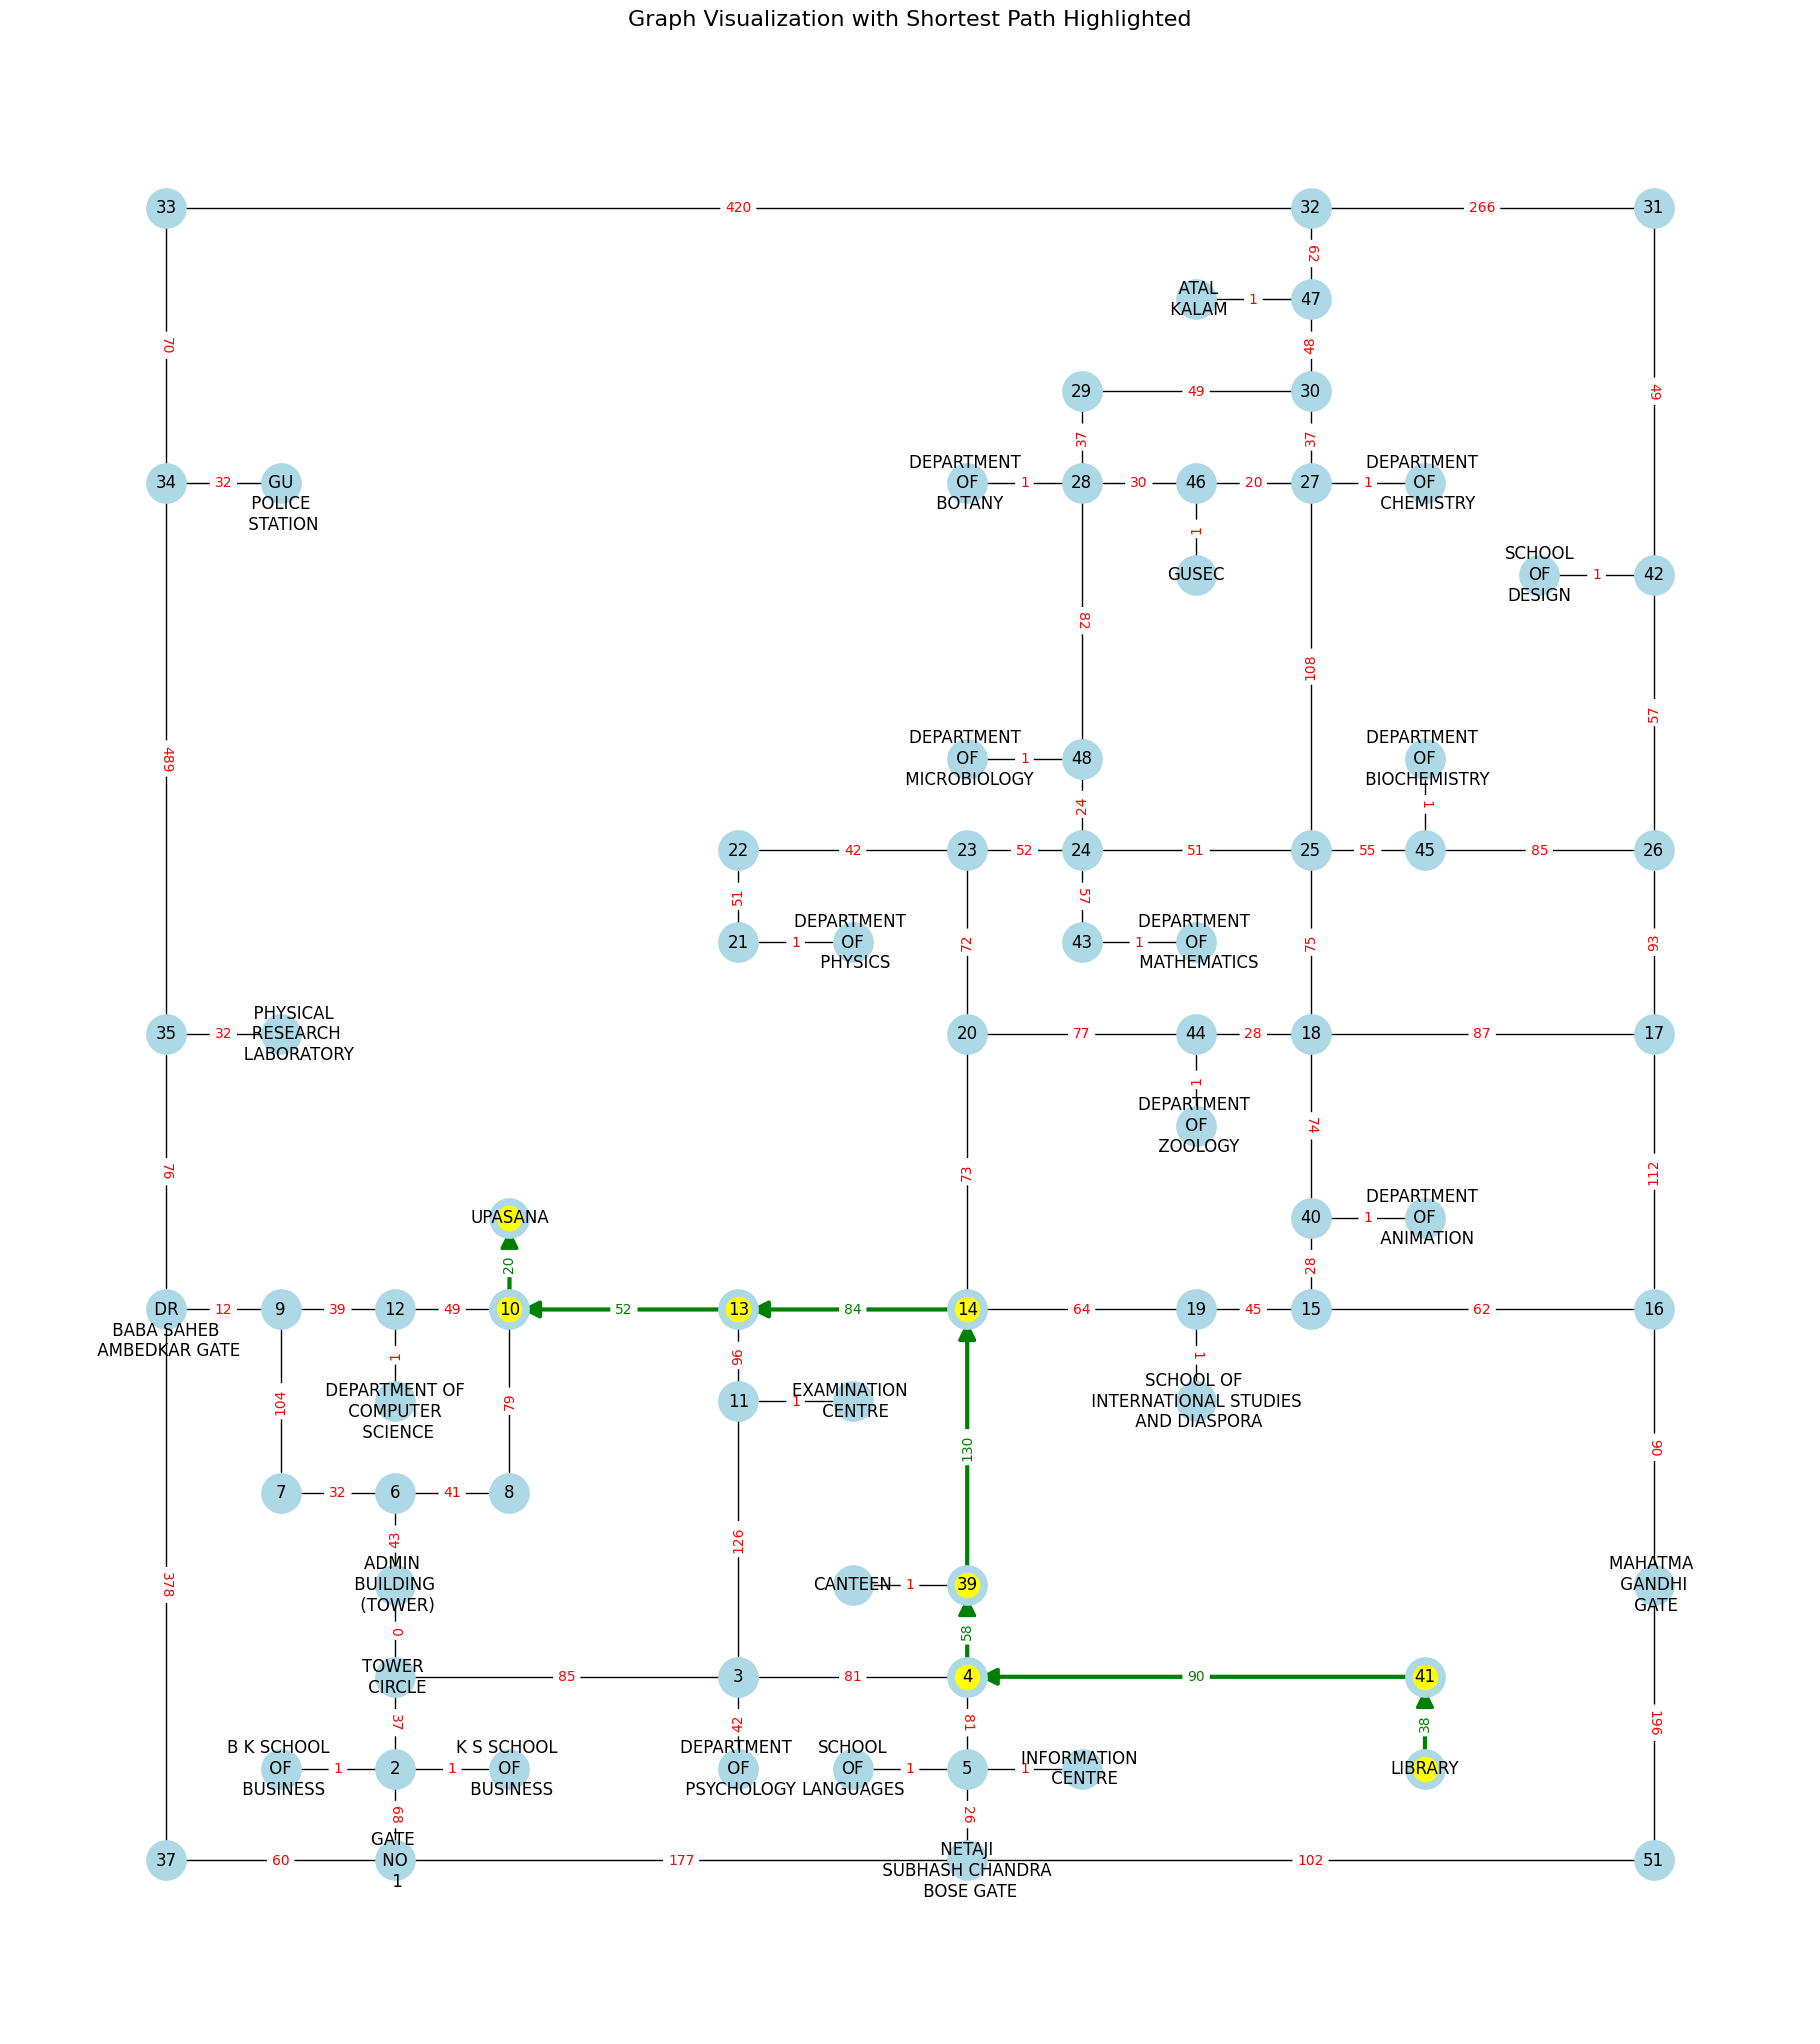

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time

class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size
        self.edges = []  # To store edges for visualization
        self.node_positions = {}  # Fixed positions for nodes
        self.display_labels = {}  # For visualization purposes

    def add_vertex_data(self, vertex, data, position):
        if 0 <= vertex < self.size:
            cleaned_data = ' '.join(data.strip().split())
            self.vertex_data[vertex] = cleaned_data
            self.node_positions[vertex] = position  # Set fixed position for visualization
            self.display_labels[vertex] = data  # Use original formatting for display

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # For undirected graph
            self.edges.append((u, v, weight))  # Save edges for visualization

    def heuristic(self, node1, node2):
        """Calculate Euclidean distance as a heuristic."""
        x1, y1 = self.node_positions[node1]
        x2, y2 = self.node_positions[node2]
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5  # Corrected formula

    def a_star(self, start_vertex_data, end_vertex_data):
        try:
            start_vertex = self.vertex_data.index(start_vertex_data)
            end_vertex = self.vertex_data.index(end_vertex_data)
        except ValueError:
            return float('inf'), []

        open_set = [(0, start_vertex)]
        came_from = {}
        g_score = {i: float('inf') for i in range(self.size)}
        g_score[start_vertex] = 0

        while open_set:
            _, current = heapq.heappop(open_set)
            
            if current == end_vertex:
                return g_score[current], self.get_path(came_from, start_vertex_data, end_vertex_data)

            for neighbor in range(self.size):
                if self.adj_matrix[current][neighbor] != 0:
                    tentative_g_score = g_score[current] + self.adj_matrix[current][neighbor]
                    if tentative_g_score < g_score[neighbor]:
                        g_score[neighbor] = tentative_g_score
                        f_score = tentative_g_score + self.heuristic(neighbor, end_vertex)
                        heapq.heappush(open_set, (f_score, neighbor))
                        came_from[neighbor] = current  

        return float('inf'), []

    def get_path(self, came_from, start_vertex_data, end_vertex_data):
        path = []
        try:
            current = self.vertex_data.index(end_vertex_data)
        except ValueError:
            return []

        while current in came_from:
            path.insert(0, self.vertex_data[current])
            current = came_from[current]
        
        path.insert(0, start_vertex_data)
        return path

    def visualize(self, path=[]):
        G = nx.Graph()
        for i, label in enumerate(self.vertex_data):
            G.add_node(i, label=self.display_labels.get(i, label))
        for u, v, weight in self.edges:
            G.add_edge(u, v, weight=weight)

        scaled_positions = {i: (x * 1.5, y * 1.5) for i, (x, y) in self.node_positions.items()}
        labels = nx.get_node_attributes(G, 'label')
        edge_labels = nx.get_edge_attributes(G, 'weight')

        plt.figure(figsize=(18, 20))
        nx.draw(G, scaled_positions, with_labels=False, node_size=800, node_color="lightblue")
        nx.draw_networkx_labels(G, scaled_positions, labels, font_size=12, font_color="black")
        nx.draw_networkx_edge_labels(G, scaled_positions, edge_labels=edge_labels, font_color="red")

        if path:
            H = nx.DiGraph()
            path_indices = [self.vertex_data.index(node) for node in path]
            for i in range(len(path_indices) - 1):
                u, v = path_indices[i], path_indices[i + 1]
                weight = self.adj_matrix[u][v]
                H.add_edge(u, v, weight=weight)

            path_edge_labels = nx.get_edge_attributes(H, 'weight')
            nx.draw_networkx_edges(H, scaled_positions, edgelist=H.edges(), edge_color="green", width=3, arrows=True, arrowsize=25)
            nx.draw_networkx_nodes(G, scaled_positions, nodelist=path_indices, node_color="yellow")
            nx.draw_networkx_edge_labels(H, scaled_positions, edge_labels=path_edge_labels, font_color="green")

        plt.title("Graph Visualization with Shortest Path Highlighted", fontsize=16)
        plt.show()

# Initialize the graph
g = Graph(76)

# Scaling factor to increase the base area
SCALING_FACTOR = 50  # Adjust this value to increase the area

# Adding vertices with fixed positions
g.add_vertex_data(0, 'ADMIN \n BUILDING \n (TOWER)', (0 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(1, 'B K SCHOOL \n OF \n BUSINESS', (-1 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(2, 'K S SCHOOL \n OF \n BUSINESS', (1 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(3, 'DEPARTMENT \n OF \n PSYCHOLOGY', (3 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(4, 'SCHOOL\nOF\nLANGUAGES', (4 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(5, 'INFORMATION \n CENTRE', (6 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(6, 'LIBRARY', (9 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(7, '\n DEPARTMENT OF \n COMPUTER \n SCIENCE', (0 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(8, 'UPASANA', (1 * SCALING_FACTOR, 4 * SCALING_FACTOR))
g.add_vertex_data(9, 'DEPARTMENT \n OF \n PHYSICS', (4 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(10, 'DEPARTMENT \n OF \n ZOOLOGY', (7 * SCALING_FACTOR, 5 * SCALING_FACTOR))
g.add_vertex_data(11, 'DEPARTMENT \n OF \n ANIMATION', (9 * SCALING_FACTOR, 4 * SCALING_FACTOR))
g.add_vertex_data(12, 'DEPARTMENT \n OF \n BOTANY', (5 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(13, 'DEPARTMENT \n OF \n MICROBIOLOGY', (5 * SCALING_FACTOR, 9 * SCALING_FACTOR))
g.add_vertex_data(14, '  ATAL \n KALAM', (7 * SCALING_FACTOR, 14 * SCALING_FACTOR))
g.add_vertex_data(15, 'DEPARTMENT \n OF \n CHEMISTRY', (9 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(16, 'DEPARTMENT \n OF \n BIOCHEMISTRY', (9 * SCALING_FACTOR, 9 * SCALING_FACTOR))
g.add_vertex_data(17, '      PHYSICAL \n       RESEARCH \n       LABORATORY', (-1 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(18, '\n \n GU \n POLICE \n STATION', (-1 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(19, 'SCHOOL\nOF\nDESIGN', (10 * SCALING_FACTOR, 11 * SCALING_FACTOR))
g.add_vertex_data(20, 'DEPARTMENT \n OF \n MATHEMATICS', (7 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(21, 'GUSEC', (7 * SCALING_FACTOR, 11 * SCALING_FACTOR))
g.add_vertex_data(75, 'SCHOOL OF \n INTERNATIONAL STUDIES \n AND DIASPORA', (7 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(22, 'EXAMINATION \n CENTRE', (4 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(23, 'CANTEEN', (4 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(24, 'TOWER \n CIRCLE', (0 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(25, '2', (0 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(26, '3', (3 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(27, '4', (5 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(28, '5', (5 * SCALING_FACTOR, -2 * SCALING_FACTOR))
g.add_vertex_data(29, '6', (0 * SCALING_FACTOR, 1 * SCALING_FACTOR))
g.add_vertex_data(30, '7', (-1 * SCALING_FACTOR, 1 * SCALING_FACTOR))
g.add_vertex_data(31, '8', (1 * SCALING_FACTOR, 1 * SCALING_FACTOR))
g.add_vertex_data(32, '9', (-1 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(33, '10', (1 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(34, '11', (3 * SCALING_FACTOR, 2 * SCALING_FACTOR))
g.add_vertex_data(35, '12', (0 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(36, '13', (3 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(37, '14', (5 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(38, '15', (8 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(39, '16', (11 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(40, '17', (11 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(41, '18', (8 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(42, '19', (7 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(43, '20', (5 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(44, '21', (3 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(45, '22', (3 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(46, '23', (5 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(47, '24', (6 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(48, '25', (8 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(49, '26', (11 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(50, '27', (8 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(51, '28', (6 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(52, '29', (6 * SCALING_FACTOR, 13 * SCALING_FACTOR))
g.add_vertex_data(53, '30', (8 * SCALING_FACTOR, 13 * SCALING_FACTOR))
g.add_vertex_data(54, '31', (11 * SCALING_FACTOR, 15 * SCALING_FACTOR))
g.add_vertex_data(55, '32', (8 * SCALING_FACTOR, 15 * SCALING_FACTOR))
g.add_vertex_data(56, '33', (-2 * SCALING_FACTOR, 15 * SCALING_FACTOR))
g.add_vertex_data(57, '34', (-2 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(58, '35', (-2 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(59, '\n \n DR \n BABA SAHEB \n AMBEDKAR GATE', (-2 * SCALING_FACTOR, 3 * SCALING_FACTOR))
g.add_vertex_data(60, '37', (-2 * SCALING_FACTOR, -3 * SCALING_FACTOR))
g.add_vertex_data(61, 'GATE \n NO \n 1', (0 * SCALING_FACTOR, -3 * SCALING_FACTOR))
g.add_vertex_data(62, '39', (5 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(63, '40', (8 * SCALING_FACTOR, 4 * SCALING_FACTOR))
g.add_vertex_data(64, '41', (9 * SCALING_FACTOR, -1 * SCALING_FACTOR))
g.add_vertex_data(65, '42', (11 * SCALING_FACTOR, 11 * SCALING_FACTOR))
g.add_vertex_data(66, '43', (6 * SCALING_FACTOR, 7 * SCALING_FACTOR))
g.add_vertex_data(67, '44', (7 * SCALING_FACTOR, 6 * SCALING_FACTOR))
g.add_vertex_data(68, '45', (9 * SCALING_FACTOR, 8 * SCALING_FACTOR))
g.add_vertex_data(69, '46', (7 * SCALING_FACTOR, 12 * SCALING_FACTOR))
g.add_vertex_data(70, '47', (8 * SCALING_FACTOR, 14 * SCALING_FACTOR))
g.add_vertex_data(71, '48', (6 * SCALING_FACTOR, 9 * SCALING_FACTOR))
g.add_vertex_data(72, '\n NETAJI \n SUBHASH CHANDRA \n BOSE GATE', (5 * SCALING_FACTOR, -3 * SCALING_FACTOR))
g.add_vertex_data(73, 'MAHATMA \n GANDHI \n GATE', (11 * SCALING_FACTOR, 0 * SCALING_FACTOR))
g.add_vertex_data(74, '51', (11 * SCALING_FACTOR, -3 * SCALING_FACTOR))

# Adding edges with distances in meters
g.add_edge(0, 24, 0)  # A - 1, weight 0 meters
g.add_edge(0, 29, 43)  # A - 6, weight 43 meters
g.add_edge(1, 25, 1)  # B - 2, weight 1 meters
g.add_edge(2, 25, 1)  # C - 2, weight 1 meters
g.add_edge(3, 26, 42)  # D - 3, weight 42 meters
g.add_edge(4, 28, 1)  # E - 5, weight 1 meters
g.add_edge(5, 28, 1)  # F - 5, weight 1 meters
g.add_edge(6, 64, 38)  # G - 41, weight 38 meters
g.add_edge(7, 35, 1)  # H - 12, weight 1 meters
g.add_edge(8, 33, 20)  # I - 10, weight 20 meters
g.add_edge(9, 44, 1)  # J - 21, weight 1 meters
g.add_edge(10, 67, 1)  # K - 44, weight 1 meters
g.add_edge(11, 63, 1)  # L - 40, weight 1 meters
g.add_edge(12, 51, 1)  # M - 28, weight 1 meters
g.add_edge(13, 71, 1)  # N - 48, weight 1 meters
g.add_edge(14, 70, 1)  # O - 47, weight 1 meters
g.add_edge(15, 50, 1)  # P - 27, weight 1 meters
g.add_edge(16, 68, 1)  # Q - 45, weight 1 meters
g.add_edge(17, 58, 32)  # R - 35, weight 32 meters
g.add_edge(18, 57, 32)  # S - 34, weight 32 meters
g.add_edge(19, 65, 1)  # T - 42, weight 1 meters
g.add_edge(20, 66, 1)  # U - 43, weight 1 meters
g.add_edge(21, 69, 1)  # V - 46, weight 1 meters
g.add_edge(22, 34, 47)  # X - 11, weight 1 meters
g.add_edge(23, 62, 47)  # Y - 39, weight 1 meters
g.add_edge(24, 0, 0)  # 1 - A, weight 0 meters
g.add_edge(24, 25, 37)  # 1 - 2, weight 37 meters
g.add_edge(24, 26, 85)  # 1 - 3, weight 85 meters
g.add_edge(25, 24, 37)  # 2 - 1, weight 37 meters
g.add_edge(25, 1, 1)  # 2 - B, weight 1 meters
g.add_edge(25, 2, 1)  # 2 - C, weight 1 meters
g.add_edge(25, 61, 68)  # 2 - 38, weight 68 meters
g.add_edge(26, 3, 42)  # 3 - D, weight 42 meters
g.add_edge(26, 24, 85)  # 3 - 1, weight 85 meters
g.add_edge(26, 27, 81)  # 3 - 4, weight 81 meters
g.add_edge(26, 34, 126)  # 3 - 11, weight 126 meters
g.add_edge(27, 26, 81)  # 4 - 3, weight 81 meters
g.add_edge(27, 28, 81)  # 4 - 5, weight 81 meters
g.add_edge(27, 62, 39)  # 4 - 39, weight 58 meters
g.add_edge(27, 64, 90)  # 4 - 41, weight 90 meters
g.add_edge(28, 27, 81)  # 5 - 4, weight 81 meters
g.add_edge(28, 4, 1)  # 5 - E, weight 1 meters
g.add_edge(28, 5, 1)  # 5 - F, weight 1 meters
g.add_edge(28, 72, 26)  # 5 - 49, weight 26 meters
g.add_edge(29, 0, 43)  # 6 - A, weight 43 meters
g.add_edge(29, 30, 32)  # 6 - 7, weight 32 meters
g.add_edge(29, 31, 41)  # 6 - 8, weight 41 meters
g.add_edge(30, 29, 32)  # 7 - 6, weight 32 meters
g.add_edge(30, 32, 104)  # 7 - 9, weight 104 meters
g.add_edge(31, 29, 41)  # 8 - 6, weight 41 meters
g.add_edge(31, 33, 79)  # 8 - 10, weight 79 meters
g.add_edge(32, 30, 104)  # 9 - 7, weight 104 meters
g.add_edge(32, 35, 39)  # 9 - 12, weight 39 meters
g.add_edge(32, 59, 12)  # 9 - 36, weight 22 meters
g.add_edge(33, 35, 49)  # 10 - 12, weight 49 meters
g.add_edge(33, 36, 52)  # 10 - 13, weight 52 meters
g.add_edge(33, 31, 79)  # 10 - 8, weight 79 meters
g.add_edge(34, 22, 1)  # 11 - X, weight 1 meters
g.add_edge(34, 36, 96)  # 11 - 13, weight 96 meters
g.add_edge(34, 26, 126)  # 11 - 3, weight 126 meters
g.add_edge(35, 33, 49)  # 12 - 10, weight 49 meters
g.add_edge(35, 32, 39)  # 12 - 9, weight 39 meters
g.add_edge(36, 34, 96)  # 13 - 11, weight 96 meters
g.add_edge(36, 33, 52)  # 13 - 10, weight 52 meters
g.add_edge(36, 37, 84)  # 13 - 14, weight 84 meters
g.add_edge(37, 36, 84)  # 14 - 13, weight 84 meters
g.add_edge(37, 42, 64)  # 14 - 19, weight 64 meters
g.add_edge(37, 62, 130)  # 14 - 39, weight 130 meters
g.add_edge(37, 43, 73)  # 14 - 20, weight 73 meters
g.add_edge(38, 42, 45)  # 15 - 19, weight 45 meters
g.add_edge(38, 39, 62)  # 15 - 16, weight 62 meters
g.add_edge(38, 63, 28)  # 15 - 40, weight 28 meters
g.add_edge(39, 38, 62)  # 16 - 15, weight 62 meters
g.add_edge(39, 40, 112)  # 16 - 17, weight 112 meters
g.add_edge(39, 73, 90)  # 16 - 50, weight 90 meters
g.add_edge(40, 39, 112)  # 17 - 16, weight 112 meters
g.add_edge(40, 41, 87)  # 17 - 18, weight 87 meters
g.add_edge(40, 49, 93)  # 17 - 26, weight 93 meters
g.add_edge(41, 40, 87)  # 18 - 17, weight 87 meters
g.add_edge(41, 63, 74)  # 18 - 40, weight 74 meters
g.add_edge(41, 67, 28)  # 18 - 44, weight 28 meters
g.add_edge(41, 48, 75)  # 18 - 25, weight 75 meters
g.add_edge(43, 37, 73)  # 20 - 14, weight 73 meters
g.add_edge(43, 46, 72)  # 20 - 23, weight 72 meters
g.add_edge(43, 67, 77)  # 20 - 44, weight 77 meters
g.add_edge(44, 9, 1)  # 21 - J, weight 1 meters
g.add_edge(44, 45, 51)  # 21 - 22, weight 51 meters
g.add_edge(45, 44, 51)  # 22 - 21, weight 51 meters
g.add_edge(45, 46, 42)  # 22 - 23, weight 42 meters
g.add_edge(46, 45, 42)  # 23 - 22, weight 42 meters
g.add_edge(46, 47, 52)  # 23 - 24, weight 52 meters
g.add_edge(46, 43, 72)  # 23 - 20, weight 72 meters
g.add_edge(47, 46, 52)  # 24 - 23, weight 52 meters
g.add_edge(47, 71, 24)  # 24 - 48, weight 24 meters
g.add_edge(47, 48, 51)  # 24 - 25, weight 51 meters
g.add_edge(47, 66, 57)  # 24 - 43, weight 57 meters
g.add_edge(48, 47, 51)  # 25 - 24, weight 51 meters
g.add_edge(48, 68, 55)  # 25 - 45, weight 55 meters
g.add_edge(48, 50, 108)  # 25 - 27, weight 108 meters
g.add_edge(48, 41, 75)  # 25 - 18, weight 75 meters
g.add_edge(49, 68, 45)  # 26 - 45, weight 85 meters
g.add_edge(49, 40, 93)  # 26 - 17, weight 93 meters
g.add_edge(49, 65, 57)  # 26 - 42, weight 57 meters
g.add_edge(50, 15, 1)  # 27 - P, weight 1 meters
g.add_edge(50, 69, 20)  # 27 - 46, weight 20 meters
g.add_edge(50, 48, 108)  # 27 - 25, weight 108 meters
g.add_edge(50, 53, 37)  # 27 - 30, weight 37 meters
g.add_edge(51, 12, 1)  # 28 - M, weight 1 meters
g.add_edge(51, 52, 37)  # 28 - 29, weight 37 meters
g.add_edge(51, 69, 30)  # 28 - 46, weight 30 meters
g.add_edge(51, 71, 82)  # 28 - 48, weight 82 meters
g.add_edge(52, 51, 37)  # 29 - 28, weight 37 meters
g.add_edge(52, 53, 49)  # 29 - 30, weight 49 meters
g.add_edge(53, 52, 49)  # 30 - 29, weight 49 meters
g.add_edge(53, 50, 37)  # 30 - 27, weight 37 meters
g.add_edge(53, 70, 48)  # 30 - 47, weight 48 meters
g.add_edge(54, 65, 49)  # 31 - 42, weight 49 meters
g.add_edge(54, 55, 266)  # 31 - 32, weight 266 meters
g.add_edge(55, 54, 266)  # 32 - 31, weight 266 meters
g.add_edge(55, 56, 420)  # 32 - 33, weight 420 meters
g.add_edge(55, 70, 62)  # 32 - 47, weight 62 meters
g.add_edge(56, 55, 420)  # 33 - 32, weight 420 meters
g.add_edge(56, 57, 70)  # 33 - 34, weight 70 meters
g.add_edge(57, 56, 70)  # 34 - 33, weight 70 meters
g.add_edge(57, 18, 32)  # 34 - S, weight 32 meters
g.add_edge(57, 58, 489)  # 34 - 35, weight 489 meters
g.add_edge(58, 57, 489)  # 35 - 34, weight 489 meters
g.add_edge(58, 17, 32)  # 35 - R, weight 32 meters
g.add_edge(58, 59, 76)  # 35 - 36, weight 76 meters
g.add_edge(59, 58, 76)  # 36 - 35, weight 76 meters
g.add_edge(59, 32, 12)  # 36 - 9, weight 22 meters
g.add_edge(59, 60, 378)  # 36 - 37, weight 378 meters
g.add_edge(60, 59, 378)  # 37 - 36, weight 378 meters
g.add_edge(60, 61, 60)  # 37 - 38, weight 60 meters
g.add_edge(61, 60, 60)  # 38 - 37, weight 60 meters
g.add_edge(61, 72, 177)  # 38 - 49, weight 177 meters
g.add_edge(61, 25, 68)  # 38 - 2, weight 68 meters
g.add_edge(62, 23, 1)  # 39 - Y, weight 1 meters
g.add_edge(62, 37, 130)  # 39 - 14, weight 130 meters
g.add_edge(62, 27, 58)  # 39 - 4, weight 58 meters
g.add_edge(63, 11, 1)  # 40 - L, weight 1 meters
g.add_edge(63, 38, 28)  # 40 - 15, weight 28 meters
g.add_edge(63, 41, 74)  # 40 - 18, weight 74 meters
g.add_edge(64, 6, 38)  # 41 - G, weight 38 meters
g.add_edge(64, 27, 90)  # 41 - 4, weight 90 meters
g.add_edge(65, 19, 1)  # 42 - T, weight 1 meters
g.add_edge(65, 54, 49)  # 42 - 31, weight 49 meters
g.add_edge(65, 49, 57)  # 42 - 26, weight 57 meters
g.add_edge(66, 20, 1)  # 43 - U, weight 1 meters
g.add_edge(66, 47, 57)  # 43 - 24, weight 57 meters
g.add_edge(67, 10, 1)  # 44 - K, weight 1 meters
g.add_edge(67, 41, 28)  # 44 - 18, weight 28 meters
g.add_edge(68, 16, 1)  # 45 - Q, weight 1 meters
g.add_edge(68, 48, 55)  # 45 - 25, weight 55 meters
g.add_edge(68, 49, 85)  # 45 - 26, weight 85 meters
g.add_edge(69, 21, 1)  # 46 - V, weight 1 meters
g.add_edge(69, 50, 20)  # 46 - 27, weight 20 meters
g.add_edge(69, 51, 30)  # 46 - 28, weight 30 meters
g.add_edge(70, 14, 1)  # 47 - O, weight 1 meters
g.add_edge(70, 53, 48)  # 47 - 30, weight 48 meters
g.add_edge(70, 55, 62)  # 47 - 32, weight 62 meters
g.add_edge(71, 13, 1)  # 48 - N, weight 1 meters
g.add_edge(71, 47, 24)  # 48 - 24, weight 24 meters
g.add_edge(71, 51, 82)  # 48 - 28, weight 82 meters
g.add_edge(72, 28, 26)  # 49 - 5, weight 26 meters
g.add_edge(72, 61, 177)  # 49 - 38, weight 177 meters
g.add_edge(72, 74, 102)  # 49 - 51, weight 102 meters
g.add_edge(73, 39, 90)  # 50 - 16, weight 90 meters
g.add_edge(73, 74, 196)  # 50 - 51, weight 196 meters
g.add_edge(74, 72, 102)  # 51 - 49, weight 102 meters
g.add_edge(74, 73, 196)  # 51 - 50, weight 196 meters
g.add_edge(42, 75, 1)  # 19 - W, weight 1 meters


#user input
source = ' '.join(input("Enter the source vertex: ").strip().upper().split())
destination = ' '.join(input("Enter the destination vertex: ").strip().upper().split())

start_time = time.perf_counter()  # More precise timer
distance, path = g.a_star(source, destination)
end_time = time.perf_counter()  # End time

execution_time = end_time - start_time  # Calculate execution time

if distance == float('inf'):
    print(f"No path exists between {source} and {destination}.")
else:
    print(f"\nShortest Path: {'->'.join(path)}")
    print(f"Distance: {distance} meters ({distance / 1000:.2f} kilometers)")
    print(f"Execution Time: {execution_time:.9f} seconds\n")  # Increased precision
    g.visualize(path)
